# Wine Analysis - Uncovering the Hidden Profiles in Wine Data

**Objective:**

Explore the provided wine dataset to uncover interesting patterns, profiles, or correlations among the different chemical constituents of the wines. The challenge is open-ended, encouraging creative and exploratory analysis.

**Task Decription:**
- Data Exploration: Perform an initial exploration of the dataset to understand the distribution and relationship of various attributes like Alcohol, Malic Acid, Flavanoids, etc. Use visual tools and statistical techniques for a comprehensive analysis.
- Clustering Analysis: Apply clustering techniques (e.g., K-Means, Hierarchical Clustering, DBSCAN) to group the wines based on their chemical properties. Determine the optimal number of clusters and justify your choice. Analyze the characteristics of each cluster. What does each cluster represent in terms of wine properties?
- Creative Insigths and Storytelling: Beyond the technical analysis, craft a narrative around your findings. What interesting stories do the data tell about the wines? Are there any unexpected correlations or findings that could be of interest to wine makers or enthusiasts?
- Presentation: The task must be presented in a Github repository where all the code and documentation should be. Extra points for the good use of this tool

**Optional tasks:**
- Containerization and Data Rerieval:
  - Containerize the Analysis: Dockerize the entire analysis pipeline. This includes creating a Dockerfile and necessary configurations to build a Docker image that can run the analysis. Separately from the python notebook where you documented your findings, you could create a dockerfile that executes the code fluidly and print some findings
  - API Data Retrieval: Enhance the task by adding a component where the wine dataset is retrieved via an API call from the link provided. This could involve setting up a simple API (using Flask or FastAPI) that serves the dataset, which the Docker container can then access to perform the analysis.
- Provide documentation: on how to set up and run the Docker container, and how to access the data through the API. (A readme will suffice)

**Evaluation criteria:**
- Depth and Creativity in data exploration and clustering analysis.
- Technical Proficiency in applying data analysis and clustering techniques.
- Quality of Insights: Uniqueness and depth of the insights and stories derived from the data.
- Optional Task: Success in containerizing the analysis and setting up data retrieval via an API, along with clear documentation.




## Dataset

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are:
- Alcohol: The percentage of alcohol content in the wine, which contributes to its body and mouthfeel.

-  Malic Acid: A type of acid found in grapes, affecting the tartness and acidity of the wine.

- Ash: The inorganic residue left after the complete burning of organic matter, indicating the mineral content in the wine.

- Ash Alcanity: The measure of the total alkalinity of the ash in the wine.

- Magnesium: A mineral present in wine that can influence its taste and mouthfeel.

- Total Phenols: The total concentration of phenolic compounds in wine, which contribute to its color, flavor, and antioxidant properties.

- Flavanoids: A subgroup of phenolic compounds that contribute to the color and flavor of the wine.

- Nonflavanoid Phenols: Phenolic compounds other than flavanoids, which also contribute to the overall phenolic content.

- Proanthocyanins: A type of flavonoid that contributes to the wine's color and mouthfeel.

- Color Intensity: The depth of color in the wine, influenced by the presence of pigments and other compounds.

- Hue: The shade of color in the wine, often described in terms of red, purple, or brown.

- OD280 (Optical Density at 280 nm): A measure of the absorbance of light by the wine at a specific wavelength, often used to assess protein content.

- Proline: An amino acid found in grapes, and its concentration in wine can be an indicator of grape maturity.


## Data cleaning and preprocessing

In [65]:
import pandas as pd;
import math
import numpy as np
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.pyplot as plt
##a364ff
#568f8b
cluster_colors = ['#ffc7ff', '#6c35de', '#4d425f', '#cd7e59', '#ddb247', '#d15252']
cluster_map = {key:value for key,value in enumerate(cluster_colors)}
cluster_mapping = ListedColormap(cluster_colors)
sns.set_palette(cluster_colors)
sns.set(rc={'font.family': 'sans-serif', 'font.sans-serif': ['DejaVu Sans']})

In [2]:
#Loading downloaded data
#Dataset link: https://storage.googleapis.com/the_public_bucket/wine-clustering.csv
wine_raw = pd.read_csv('../data/wine_raw.csv')

In [3]:
wine_raw.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

### Data cleaning and preprocessing

#### Missing Values

We perform a quick check for missing values.

In [4]:
wine_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


We can see there are no missing values and the data types are correct for each column.

#### Outliers

In [127]:
def plot_boxplots(df):
    nrows = math.ceil(len(df.columns)/3)
    ncols = min(len(df.columns),3)

    plt.figure(figsize=(ncols*4,nrows*2))

    plt.suptitle("\nWine Features Boxplot", fontsize=14)
    for i,col in enumerate(df.columns):
        plt.subplot(nrows,ncols,i+1);
        sns.boxplot(x=df[col], color='#6c35de')
        plt.xlabel(col, fontsize=10)

    plt.tight_layout()
    plt.show();

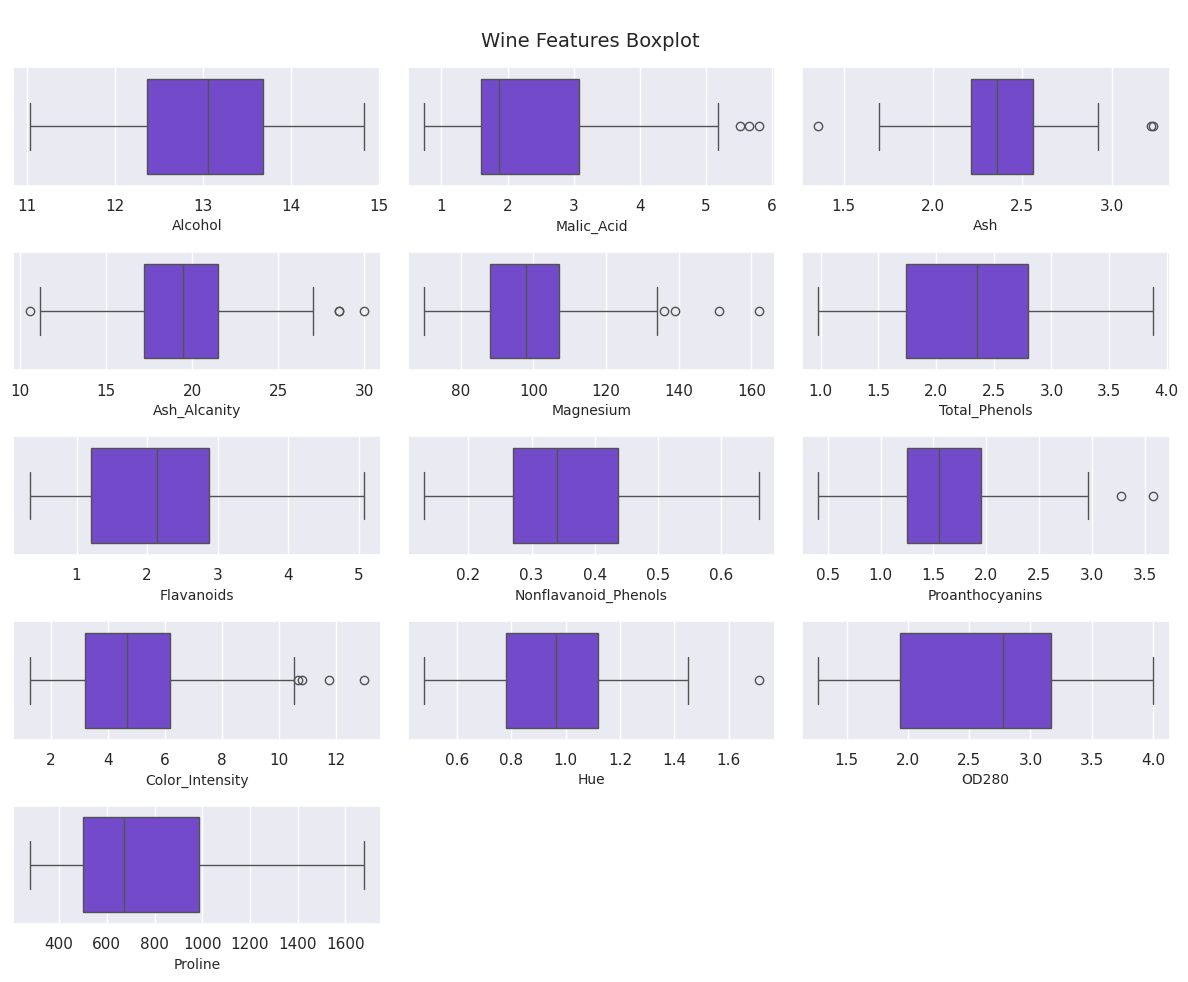

In [128]:
plot_boxplots(wine_raw)


In [68]:
def remove_outliers_iqr(df, columns=None):
    """
    Remove outliers from a DataFrame based on the Interquartile Range (IQR).

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - columns (list): List of columns to consider. If None, all numeric columns will be considered.

    Returns:
    - pd.DataFrame: DataFrame without outliers.
    """

    if columns is None:
        columns = df.select_dtypes(include='number').columns.tolist()

    filtered_df = df.copy()

    for column in columns:
        # Calculate quartiles
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        # Calculate IQR
        IQR = Q3 - Q1

        # Define upper and lower bounds to identify outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        filtered_df = filtered_df[(filtered_df[column] >= lower_bound) & (filtered_df[column] <= upper_bound)]

    return filtered_df

In [69]:
wine_cleaned = remove_outliers_iqr(wine_raw)

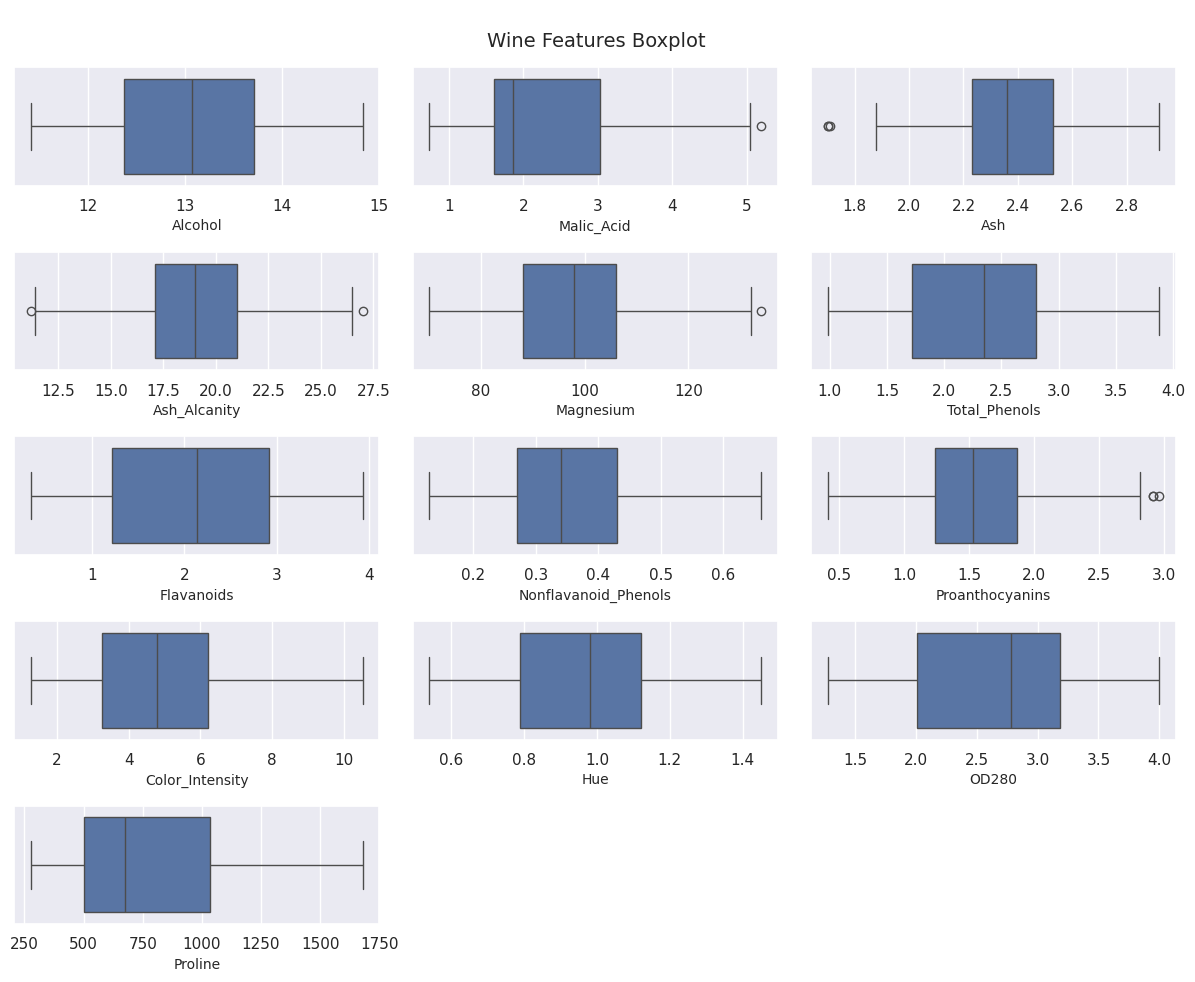

In [70]:
plot_boxplots(wine_cleaned)

## Exploratory Data Analysis (EDA) - Data Exploration task

Data is visualized and analyzed to gain an initial understanding. In this stage we use descriptive statistics, data visualization libraries, and tools to help uncover patterns, relationships, and potential insights.

Perform an initial exploration of the dataset to understand the distribution and relationship of various attributes like Alcohol, Malic Acid, Flavanoids, etc.
Use visual tools and statistical techniques for a comprehensive analysis.


#### Descriptive Statistics

In [71]:
wine_cleaned.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  161.000000  161.000000  161.000000    161.000000  161.000000   
mean    13.040373    2.306832    2.363292     19.232298   98.534161   
std      0.797841    1.048263    0.241205      3.014706   12.365290   
min     11.410000    0.740000    1.700000     11.200000   70.000000   
25%     12.370000    1.610000    2.230000     17.100000   88.000000   
50%     13.070000    1.860000    2.360000     19.000000   98.000000   
75%     13.710000    3.030000    2.530000     21.000000  106.000000   
max     14.830000    5.190000    2.920000     27.000000  134.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     161.000000  161.000000            161.000000       161.000000   
mean        2.290373    2.043789              0.358137         1.548075   
std         0.632366    0.985649              0.121810         0.525859   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.720000    1.220000              0.270000         1.240000   
50%         2.350000    2.140000              0.340000         1.530000   
75%         2.800000    2.910000              0.430000         1.870000   
max         3.880000    3.930000              0.660000         2.960000   

       Color_Intensity         Hue       OD280      Proline  
count       161.000000  161.000000  161.000000   161.000000  
mean          5.014161    0.959106    2.628820   759.111801  
std           2.117379    0.218049    0.709052   323.866465  
min           1.280000    0.540000    1.270000   278.000000  
25%           3.270000    0.790000    2.010000   502.000000  
50%           4.800000    0.980000    2.780000   675.000000  
75%           6.200000    1.120000    3.180000  1035.000000  
max          10.520000    1.450000    4.000000  1680.000000

In [72]:
def plot_distplots(df):
    """
    Plot distplots for all wine DataFrame columns

    Parameters:
    - df(pd.DataFrame): Input DataFrame

    Returns:
    - None
    """
    nrow=max(math.ceil(len(df.columns)/3),1)
    ncols = min(len(df.columns),3)
    fig, axes = plt.subplots(nrows=nrow, ncols=3, figsize=(ncols*5,nrow*2.5))
    plt.suptitle("\nWine Features Distplot\n", fontsize=20)

    axes=axes.flatten()
    n_to_remove = 3-round(round((len(df.columns)/3)%1,2)*3)
    for i in range(1,n_to_remove+1):
        axes[-i].remove()

    for index, col in enumerate(df.columns):
        sns.distplot(x=df[col],ax=axes[index], bins=40)
        axes[index].set_xlabel(f'{col}')

    plt.tight_layout()
    plt.show();
    return None

/tmp/ipykernel_2670/3624025345.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[col],ax=axes[index], bins=40)
/tmp/ipykernel_2670/3624025345.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[col],ax=axes[index], bins=40)
/tmp/ipykernel_2670/3624025345.py:22: UserWarning: 

`dist

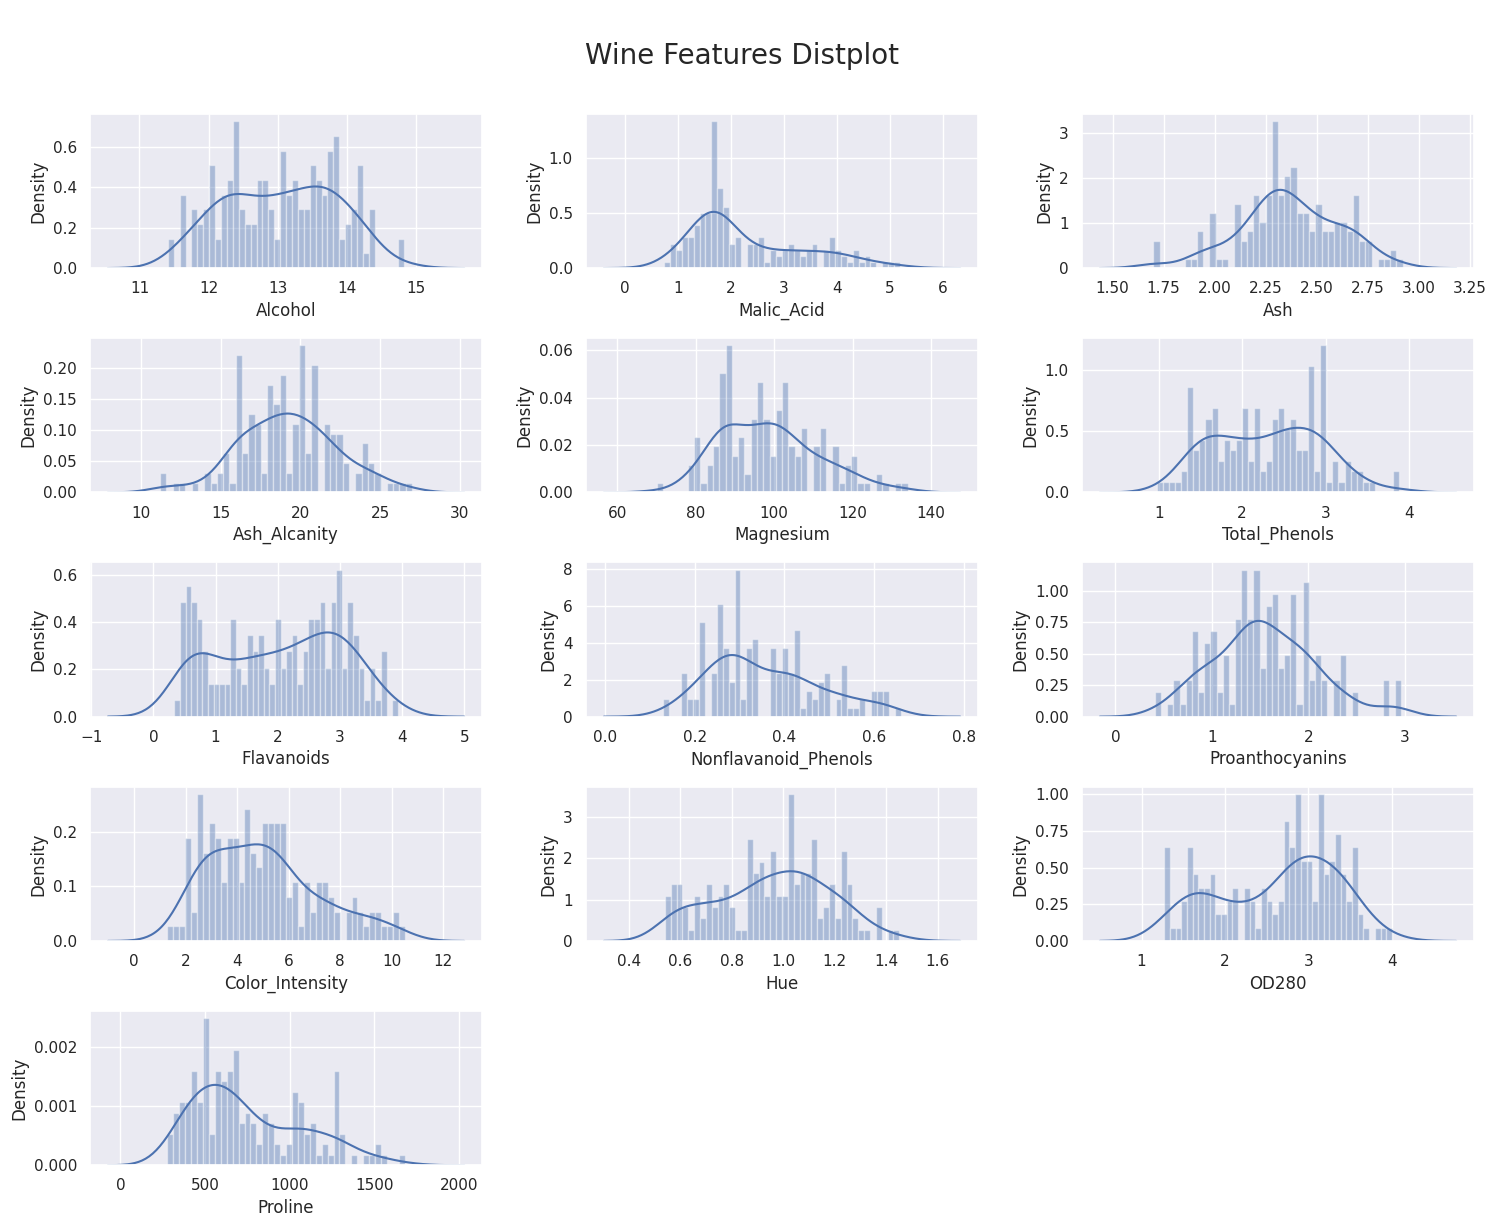

In [73]:
plot_distplots(wine_cleaned)

In [74]:
def plot_correlations(df_cleaned):
    """
    Plot correlation matrix for Wine DataFrame

    Parameters:
    - df_cleaned(pd.DataFrame): Input DataFrame

    Returns:
    - Correlation Matrix
    """
    correlation_matrix = df_cleaned.corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=.5, annot=True, annot_kws={'fontsize':8}, fmt = ".2f")

    # Customize the plot
    plt.title('\nCorrelation Heatmap', fontsize=20, pad=20)
    plt.show()
    return correlation_matrix

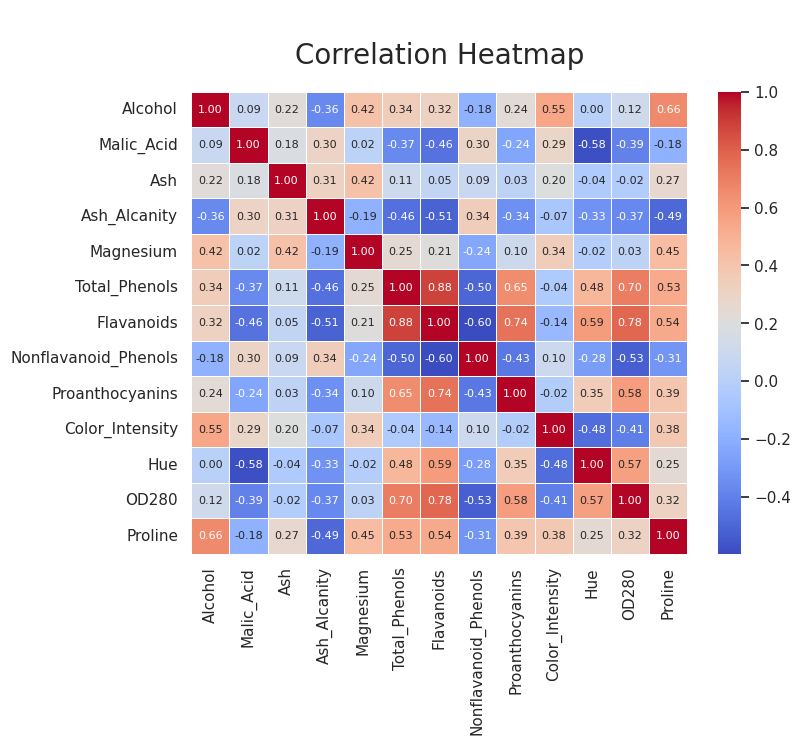

In [75]:
correlation_matrix = plot_correlations(wine_cleaned)

In [76]:
def plot_correlated_scatters(df,lower_bound, upper_bound):
    correlation_matrix = df.corr()
    filtered_correlation_matrix = correlation_matrix[((correlation_matrix>lower_bound) & (correlation_matrix<upper_bound)) \
        | ((correlation_matrix<-1*lower_bound) & (correlation_matrix>-1*upper_bound))]

    cleaned_matrix = filtered_correlation_matrix.dropna(how='all').dropna(axis=1, how='all')
    pairs = []
    i=0
    for index, row in cleaned_matrix.iterrows():
        for j,col in enumerate(cleaned_matrix.columns):
            if j<i:
                if (row[col] > 0) | (row[col] < 0) :
                    pairs.append((col,index, row[col]))
            else:
                pass
        i+=1
    nrow=max(math.ceil(len(pairs)/3),1)
    fig, axes = plt.subplots(nrows=nrow, ncols=3, figsize=(10,nrow*3.5))
    fig.suptitle(f'\nWine Features Scatter Plots ({lower_bound}<corr<{upper_bound})\n', fontsize=16)

    axes=axes.flatten()
    if round(round((len(pairs)/3)%1,2)*3) == 0:
        n_to_remove = 0
    else:
        n_to_remove = 3 - int(round(round((len(pairs)/3)%1,2)*3))
    for i in range(1,n_to_remove+1):
        axes[-i].remove()

    for index, pair in enumerate(pairs):
        sns.scatterplot(data=df, x=pair[0],y=pair[1],ax=axes[index],s=50, edgecolor=None, alpha=0.7,zorder=2)

        axes[index].set_title(f'{pair[0]}\nvs\n{pair[1]}\ncorr = {round(pair[2],2)}', fontsize=12)
        axes[index].set_facecolor('#f0f0f0')
        axes[index].set_xlabel(pair[0], fontsize=10)
        axes[index].set_ylabel(pair[1],fontsize=10)
        # Add grid lines
        axes[index].grid(True, linestyle='-', alpha=0.7, color='white', zorder=1, linewidth=1.5)
        # Remove border lines
        for spine in axes[index].spines.values():
            spine.set_visible(False)

    plt.tight_layout()
    plt.show();
    return cleaned_matrix


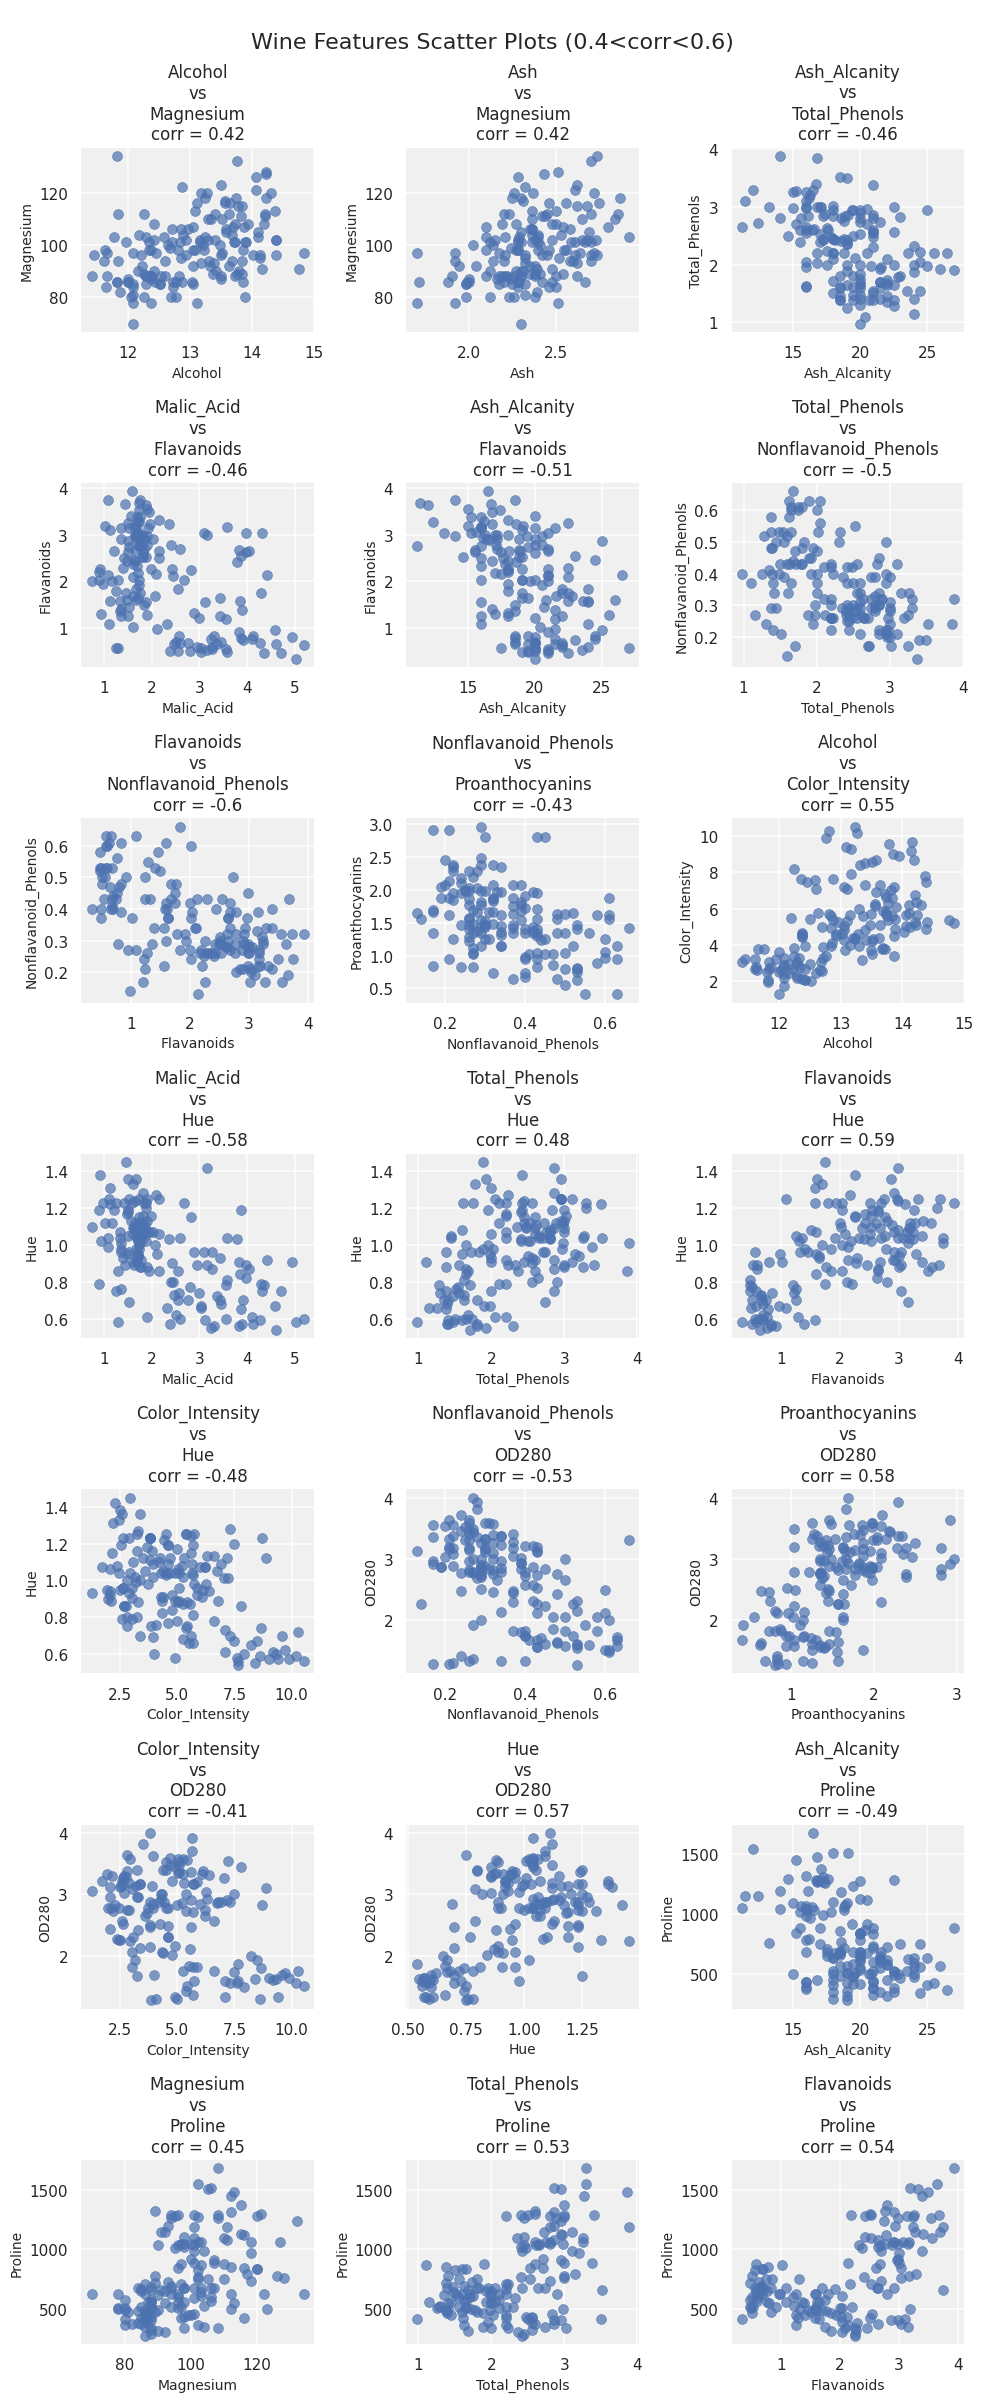

In [77]:
medium_correlation = plot_correlated_scatters(wine_cleaned,0.4,0.6)

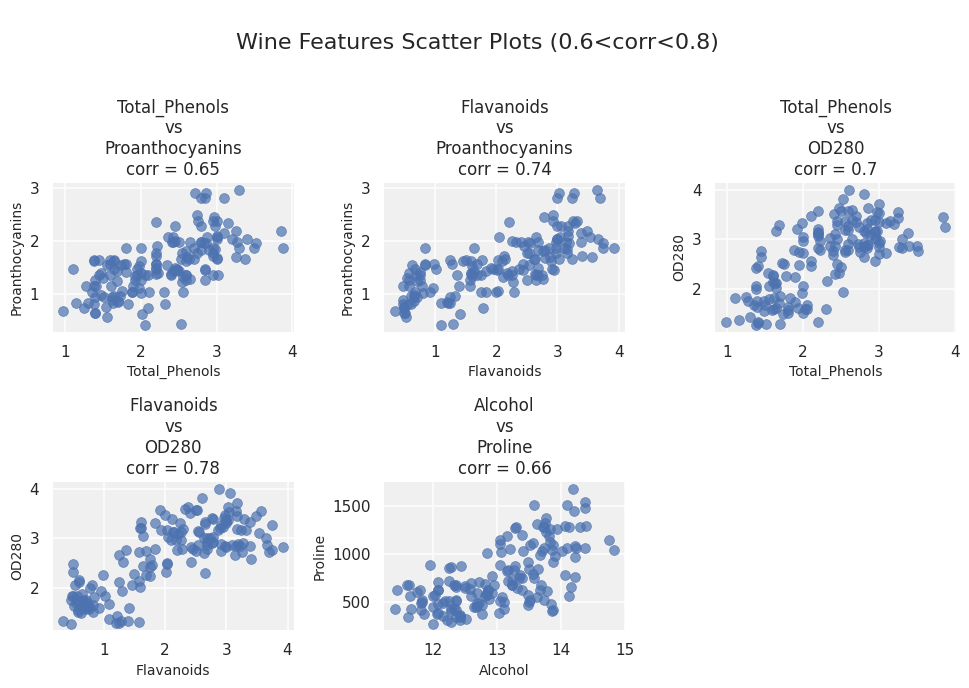

In [78]:
strong_correlation = plot_correlated_scatters(wine_cleaned,0.6,0.8)

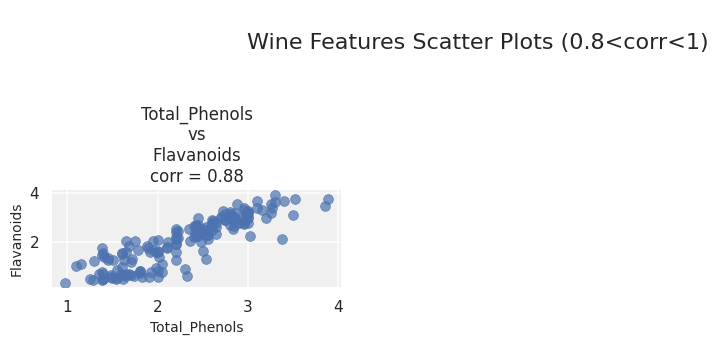

In [79]:
very_strong_correlation = plot_correlated_scatters(wine_cleaned,0.8,1)

In [80]:
print(medium_correlation)
print(strong_correlation)
print(very_strong_correlation)

                       Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  \
Alcohol                    NaN         NaN       NaN           NaN   0.418736   
Malic_Acid                 NaN         NaN       NaN           NaN        NaN   
Ash                        NaN         NaN       NaN           NaN   0.417566   
Ash_Alcanity               NaN         NaN       NaN           NaN        NaN   
Magnesium             0.418736         NaN  0.417566           NaN        NaN   
Total_Phenols              NaN         NaN       NaN     -0.461560        NaN   
Flavanoids                 NaN   -0.455470       NaN     -0.514226        NaN   
Nonflavanoid_Phenols       NaN         NaN       NaN           NaN        NaN   
Proanthocyanins            NaN         NaN       NaN           NaN        NaN   
Color_Intensity       0.549755         NaN       NaN           NaN        NaN   
Hue                        NaN   -0.582334       NaN           NaN        NaN   
OD280                      N

### Insights of the analysis 

#### **Correlations**
##### Positive Correlations:
There are positive correlations between alcohol content and magnesium, color intensity, and proline. Wines with higher alcohol content tend to exhibit higher levels of magnesium, color intensity, and proline. This may suggest that these attributes are positively associated with alcohol content.

##### Negative Correlations:
There are negative correlations between malic acid and both flavanoids and hue. Wines with higher malic acid content tend to have lower levels of flavanoids and lower hue values. This suggests an inverse relationship between malic acid and these attributes.

##### Strong Relationships:
Strong positive correlations exist between total phenols and both flavanoids and OD280. Additionally, there is a strong correlation between flavanoids and OD280. These strong relationships indicate that these pairs of attributes tend to vary together, and they may play significant roles in defining the overall chemical composition and quality of the wine.

##### Trade-Offs:
There is a moderate negative correlation between total phenols and nonflavanoid phenols, suggesting a potential trade-off between these two types of phenolic compounds. Wines with higher total phenols may have lower levels of nonflavanoid phenols.

##### Quality Indicators:
The strong correlations involving total phenols, flavanoids, and OD280 suggest that these attributes may be important indicators of wine quality. Wines with higher total phenols and flavanoids, as well as higher OD280 values, might be associated with higher perceived quality.

##### Color Relationships:
Alcohol content is positively correlated with color intensity, suggesting that wines with higher alcohol content may exhibit more intense color. Additionally, there is a negative correlation between malic acid and hue, indicating that wines with higher malic acid may have a lower color hue.

##### Further Investigation:
While correlations provide valuable insights, they do not imply causation. Further investigation, potentially using advanced statistical and machine learning techniques, can help unravel complex relationships and dependencies within the dataset.

## Clustering Analysis

Potential Clustering Factors:

The identified correlations can serve as valuable input for clustering analysis. Attributes with strong correlations may contribute to the definition of distinct wine profiles, helping to identify groups of wines that share similar characteristics.

Apply clustering techniques (e.g., K-Means, Hierarchical Clustering, DBSCAN) to group the wines based on their chemical properties. Determine the optimal number of clusters and justify your choice.

Analyze the characteristics of each cluster. What does each cluster represent in terms of wine properties?


### KMeans Scaled

In [81]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [82]:
def k_test(X,k_tests):
    wcss = []; silo = []
    random_state=42
    for k in k_tests:
        clustering = KMeans(k,random_state=random_state).fit(X)
        wcss.append(clustering.inertia_)
        silo.append(silhouette_score(X,clustering.predict(X)))

    tests_dict = {'k':{
        key:{'wcss':wcss[i],
             'silo':silo[i]} for i,key in enumerate(k_tests)}
    }


    plt.figure(figsize=(10,4))
    plt.suptitle("\nNumber of cluster decision throught Elbow Method and Siloutte Score", fontsize=14)

    plt.subplot(1,2,1);
    plt.title("Within-Cluster-Sum-of-Squares", fontsize=12)
    plt.scatter(k_tests, wcss, marker='o', edgecolor='k')
    plt.plot(k_tests, wcss, linestyle='--')
    plt.xlabel('Number of Clusters (k)', fontsize=10)
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=10)

    plt.subplot(1,2,2);
    plt.title("Silhouette Width", fontsize=12)
    plt.scatter(k_tests, silo, marker='o', edgecolor='k')
    plt.plot(k_tests, silo, linestyle='--')
    plt.xlabel('Number of Clusters (k)', fontsize=10)
    plt.ylabel('Silhouette Score)', fontsize=10)

    plt.tight_layout()

    return tests_dict

In [83]:
def k_means(X:pd.DataFrame,k=3,random_state=42):
    km = KMeans(n_clusters=k,
            max_iter=300,
            tol=1e-04,
            init='k-means++',
            n_init=10,
            random_state=random_state)
    km_fit = km.fit(X)
    cluster_assignments = km.predict(X)
    return km,km_fit,cluster_assignments

In [84]:
def plot_clusters(X,km,title=None,random_state=42,subplot=False,nrows=1,ncols=1,index=1):

    cluster_assignments = km.labels_
    k = len(list(set(cluster_assignments)))
    if subplot==False:
        plt.figure(figsize=(6,4))
    else:
        plt.subplot(nrows,ncols,index);


    plt.suptitle(title, fontsize=14)
    plt.title(f"KMeans Clustering (k={k})", fontsize=12)
    sns.scatterplot(data=X, x=X.columns[0],y=X.columns[1],hue=cluster_assignments,s=25, edgecolor=None, palette=cluster_map)
    plt.tight_layout()

In [85]:
X= wine_cleaned.copy()
X = pd.DataFrame(StandardScaler().fit_transform(X), columns = X.columns)

{'k': {2: {'wcss': 1450.924789110024, 'silo': 0.2721694748562935},
  3: {'wcss': 1079.656188273965, 'silo': 0.3010147337033009},
  4: {'wcss': 1008.3356545218967, 'silo': 0.23984454606050373},
  5: {'wcss': 951.6773855904653, 'silo': 0.19564264892175698},
  6: {'wcss': 896.3838295853074, 'silo': 0.1383299938492229}}}

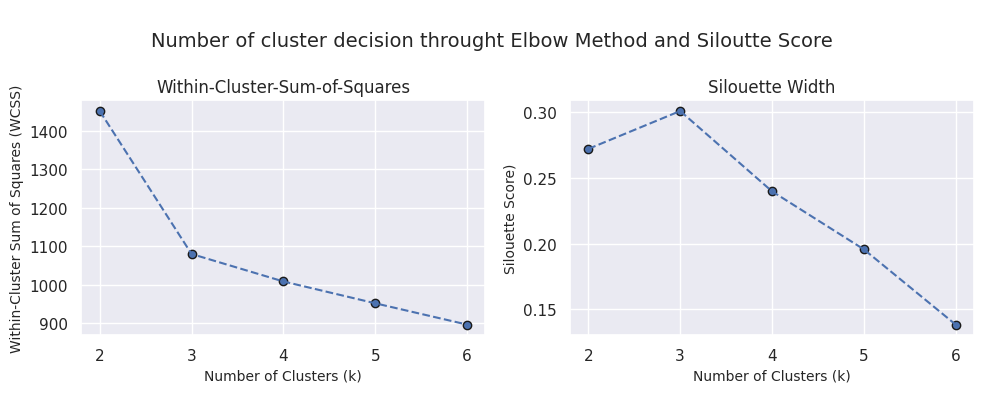

In [86]:
k_test(X, [2,3,4,5,6])

**Within-Cluster Sum of Squares (WCSS):**
- WCSS measures the compactness of clusters in K-means clustering. 
- It is calculated as the sum of the squared distances between each data point within a cluster and the centroid of that cluster.
- The goal of K-means is to minimize WCSS, meaning to create tight and well-defined clusters.

**Silhouette Width:**
- Silhouette width measures how well-separated the clusters are. 
- It considers both the cohesion (how close the points in a cluster are to each other) and separation (how well-separated clusters are from each other).
- The silhouette width ranges from -1 to 1, where a higher value indicates better-defined clusters.


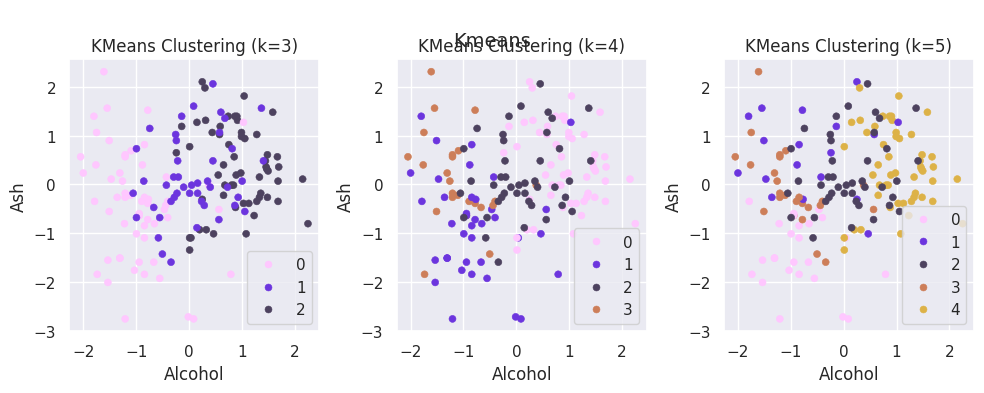

In [87]:
plt.figure(figsize=(10,4))

# -----Perform Kmeans clustering with k=3
km, km_fit, cluster_assigns = k_means(X,k=3)
plot_clusters(X,km, subplot=True,nrows=1,ncols=3,index=1)

# -----Perform Kmeans clustering with k=4
km_4, km_fit_4, cluster_4 = k_means(X,k=4)
plot_clusters(X,km_4, subplot=True,nrows=1,ncols=3,index=2)

# -----Perform Kmeans clustering with k=5
km_5, km_fit_5, cluster_5 = k_means(X,k=5)
plot_clusters(X,km_5, subplot=True,nrows=1,ncols=3,index=3)

plt.suptitle('\nKmeans\n', fontsize=14);

### PCA (Scaled)

In [88]:
from sklearn.decomposition import PCA
import numpy as np

In [89]:
def plot_pca_n_decision(X_scaled):
    #selection the correct number of components
    pca = PCA()
    pca.fit(X_scaled)

    # Explained variance for each component
    explained_variance = pca.explained_variance_ratio_

    # Cumulative explained variance
    cumulative_variance = np.cumsum(explained_variance)

    # Plot explained variance
    plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
    plt.xlabel('Number of Components', fontsize=10)
    plt.ylabel('Cumulative Explained Variance', fontsize=10)
    plt.title('\nExplained Variance vs. Number of Components\n', fontsize=14)
    plt.show()
    return cumulative_variance


In [90]:
X=wine_cleaned.copy()
X_transformed=StandardScaler().fit_transform(X)

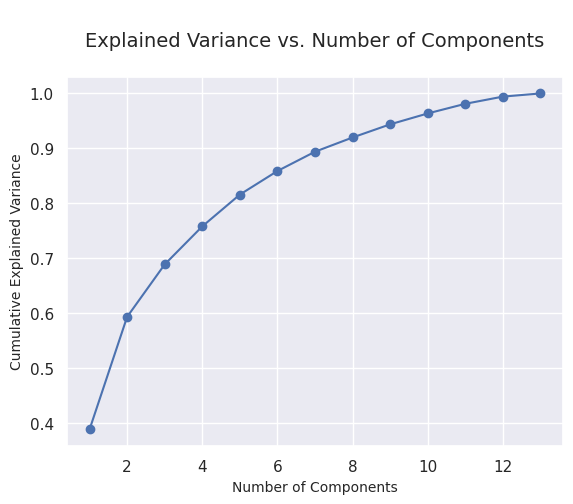

In [91]:
plot_pca_n_decision(X_transformed)

In [92]:
pca = PCA(n_components=3).fit(X_transformed)
X_pca = pd.DataFrame(pca.transform(X_transformed), columns = [f'PC{i}' for i in range(3)])

{'k': {2: {'wcss': 819.1829689192173, 'silo': 0.3985592166046624},
  3: {'wcss': 435.3460030965341, 'silo': 0.47196438938489754},
  4: {'wcss': 377.97399470459675, 'silo': 0.38987566844864746},
  5: {'wcss': 323.18548660899376, 'silo': 0.3442784624322917},
  6: {'wcss': 288.6856815998285, 'silo': 0.34053084578868065},
  7: {'wcss': 261.26901730400624, 'silo': 0.34332085919791105}}}

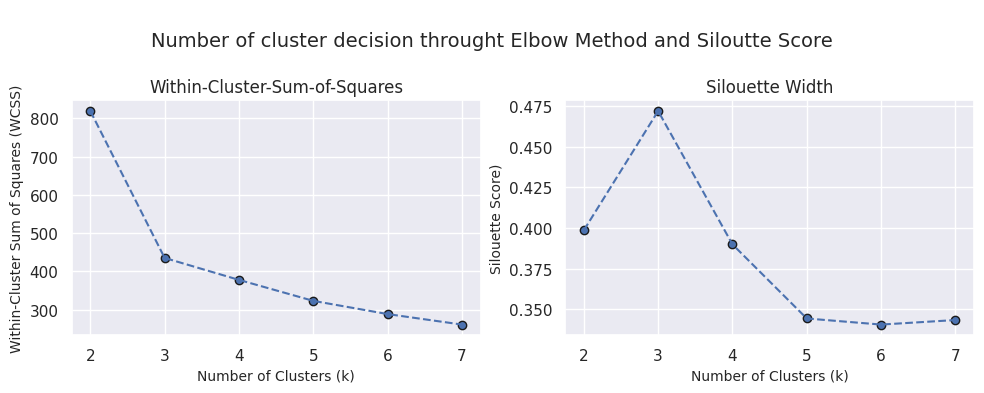

In [93]:
k_test(X_pca, [2,3,4,5,6,7])

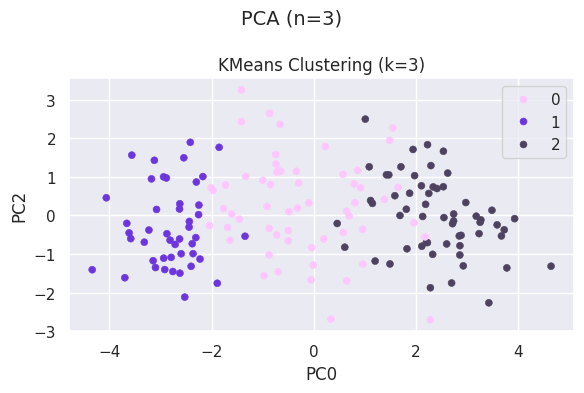

In [96]:
km_pca,km_fit_pca, cluster_assignments = k_means(X_pca)
plot_clusters(X_pca,km_pca, title='PCA (n=3)')


In [97]:
# Biplot function
def biplot(score, cluster_labels, coeff, labels=None):
    xs = score.loc[:, score.columns[0]]
    ys = score.loc[:, score.columns[1]]
    n = coeff.shape[0]

    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())

    sns.scatterplot(x= xs * scalex, y = ys * scaley, hue = cluster_labels, palette=cluster_map)

    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var" + str(i + 1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

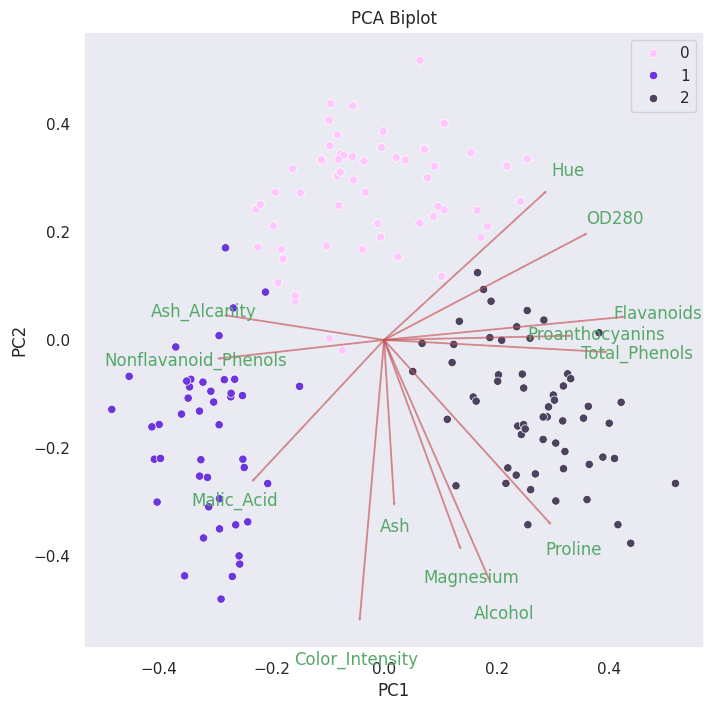

In [98]:
plt.figure(figsize=(8, 8))
biplot(X_pca, cluster_assignments, np.transpose(pca.components_), labels=wine_cleaned.columns)
plt.title("PCA Biplot")
plt.show()


**OBSERVATIONS:**

- Alkalinity of Ash, Nonflavanoid phenols and Malic acid tends to form one of the clusters.
- Color Intensity, Ash, Alcohol, Magnesium and Proline tends to form another cluster.
- Hue, Diluted wines, Flavanoids and Proanthocyanins tends to form yet another cluster.

## Variables analysis

In [99]:
wine_cleaned['cluster'] = cluster_assignments

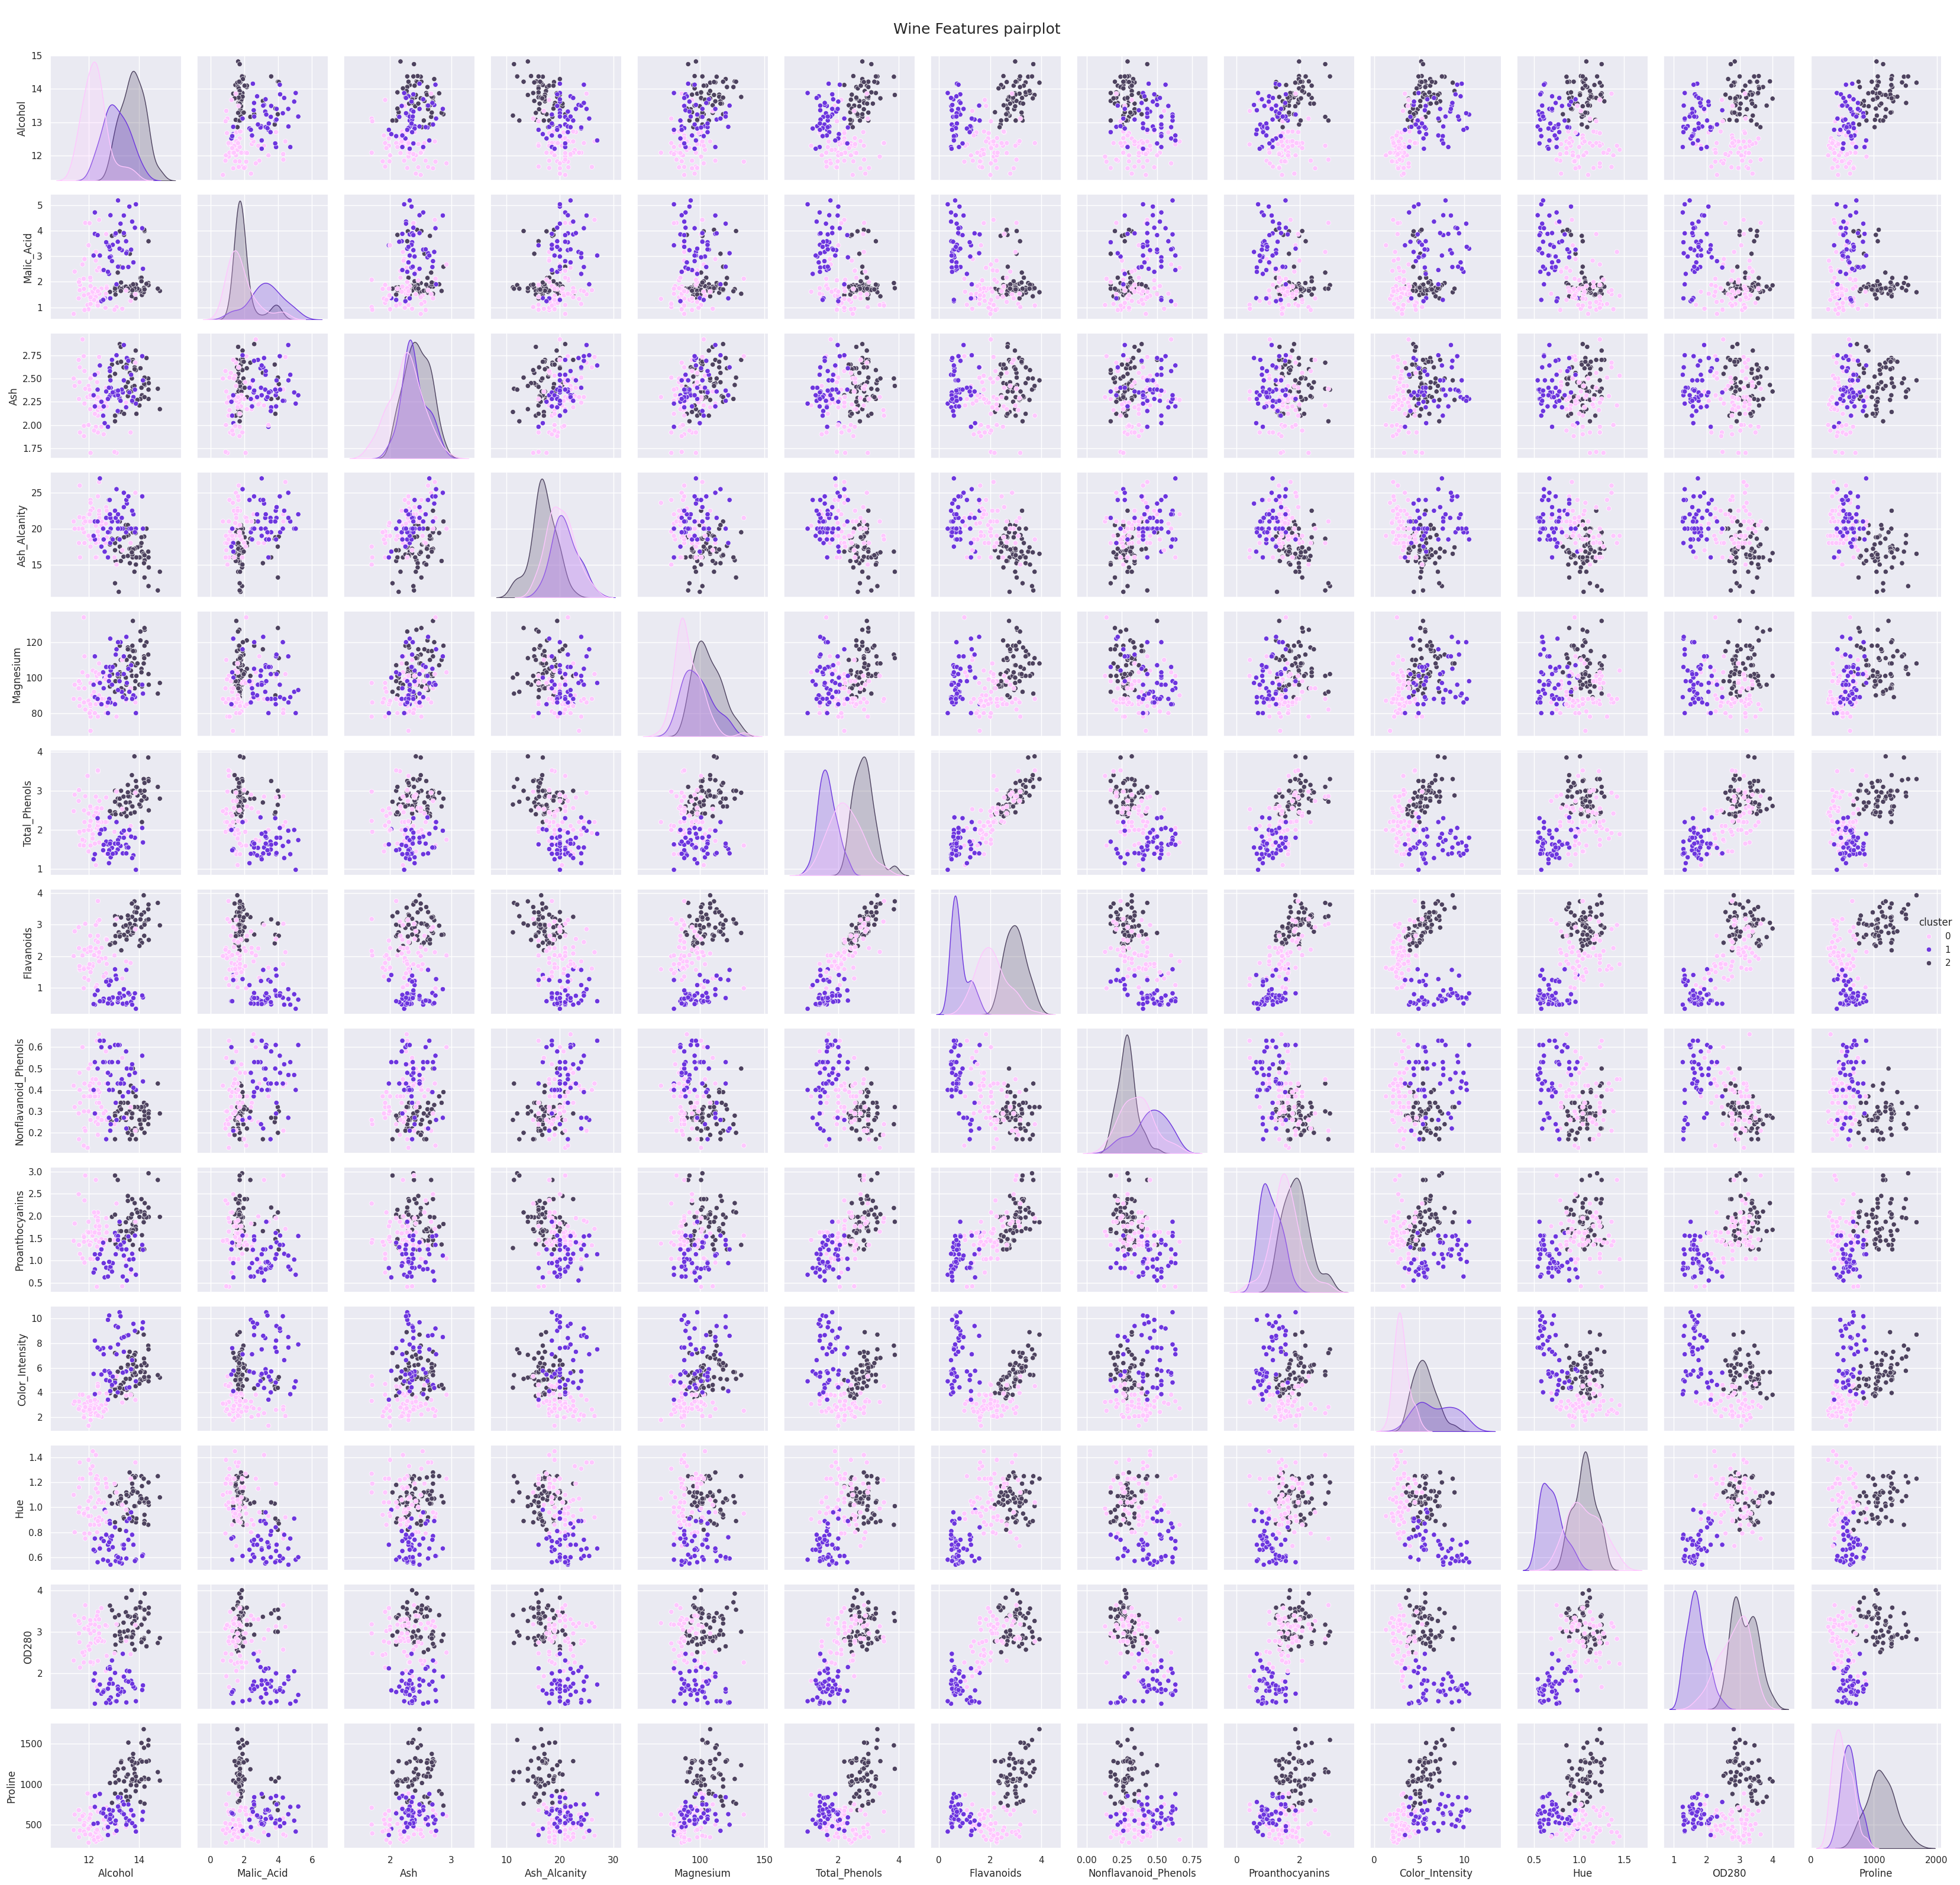

In [126]:
def pairplot(df:pd.DataFrame,title=None):
    sns.pairplot(df, hue='cluster', palette=cluster_map)
    plt.suptitle(title, fontsize=18)
    plt.tight_layout()

pairplot(wine_cleaned, '\nWine Features pairplot\n\n' )


### Mean Analysis

In [101]:
X['cluster'] = cluster_assignments
X_std = pd.DataFrame(X_transformed, columns = X.drop(columns=['cluster']).columns)
X_std['cluster'] = cluster_assignments

X_mean = pd.concat([pd.DataFrame(X.mean().drop('cluster'), columns=['mean']),
                   X.groupby('cluster').mean().T], axis=1)

X_dev_rel = X_mean.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_dev_rel.drop(columns=['mean'], inplace=True)
X_mean.drop(columns=['mean'], inplace=True)

X_std_mean = pd.concat([pd.DataFrame(X_std.mean().drop('cluster'), columns=['mean']),
                   X_std.groupby('cluster').mean().T], axis=1)

X_std_dev_rel = X_std_mean.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_std_dev_rel.drop(columns=['mean'], inplace=True)
X_std_mean.drop(columns=['mean'], inplace=True)

In [102]:
X.head(5)

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  cluster  
0   3.92     1065        2  
1   3.40     1050        2  
2   3.17     1185        2  
3   3.45     1480        2  
4   2.93      735        2

In [103]:
X_mean.head(5)

0          1           2
Alcohol       12.277069  13.100889   13.756724
Malic_Acid     1.845345   3.284222    2.010000
Ash            2.259310   2.395333    2.442414
Ash_Alcanity  20.187931  21.006667   16.900000
Magnesium     91.086207  98.466667  106.034483

In [104]:
X_dev_rel.head(5)

0     1     2
Alcohol       -6.0   0.0   5.0
Malic_Acid   -20.0  42.0 -13.0
Ash           -4.0   1.0   3.0
Ash_Alcanity   5.0   9.0 -12.0
Magnesium     -8.0  -0.0   8.0

In [105]:
X_dev_rel

0     1     2
Alcohol               -6.0   0.0   5.0
Malic_Acid           -20.0  42.0 -13.0
Ash                   -4.0   1.0   3.0
Ash_Alcanity           5.0   9.0 -12.0
Magnesium             -8.0  -0.0   8.0
Total_Phenols         -2.0 -28.0  24.0
Flavanoids             1.0 -61.0  46.0
Nonflavanoid_Phenols   0.0  25.0 -20.0
Proanthocyanins        1.0 -30.0  23.0
Color_Intensity      -40.0  37.0  11.0
Hue                   11.0 -27.0  11.0
OD280                  7.0 -35.0  20.0
Proline              -33.0 -18.0  48.0

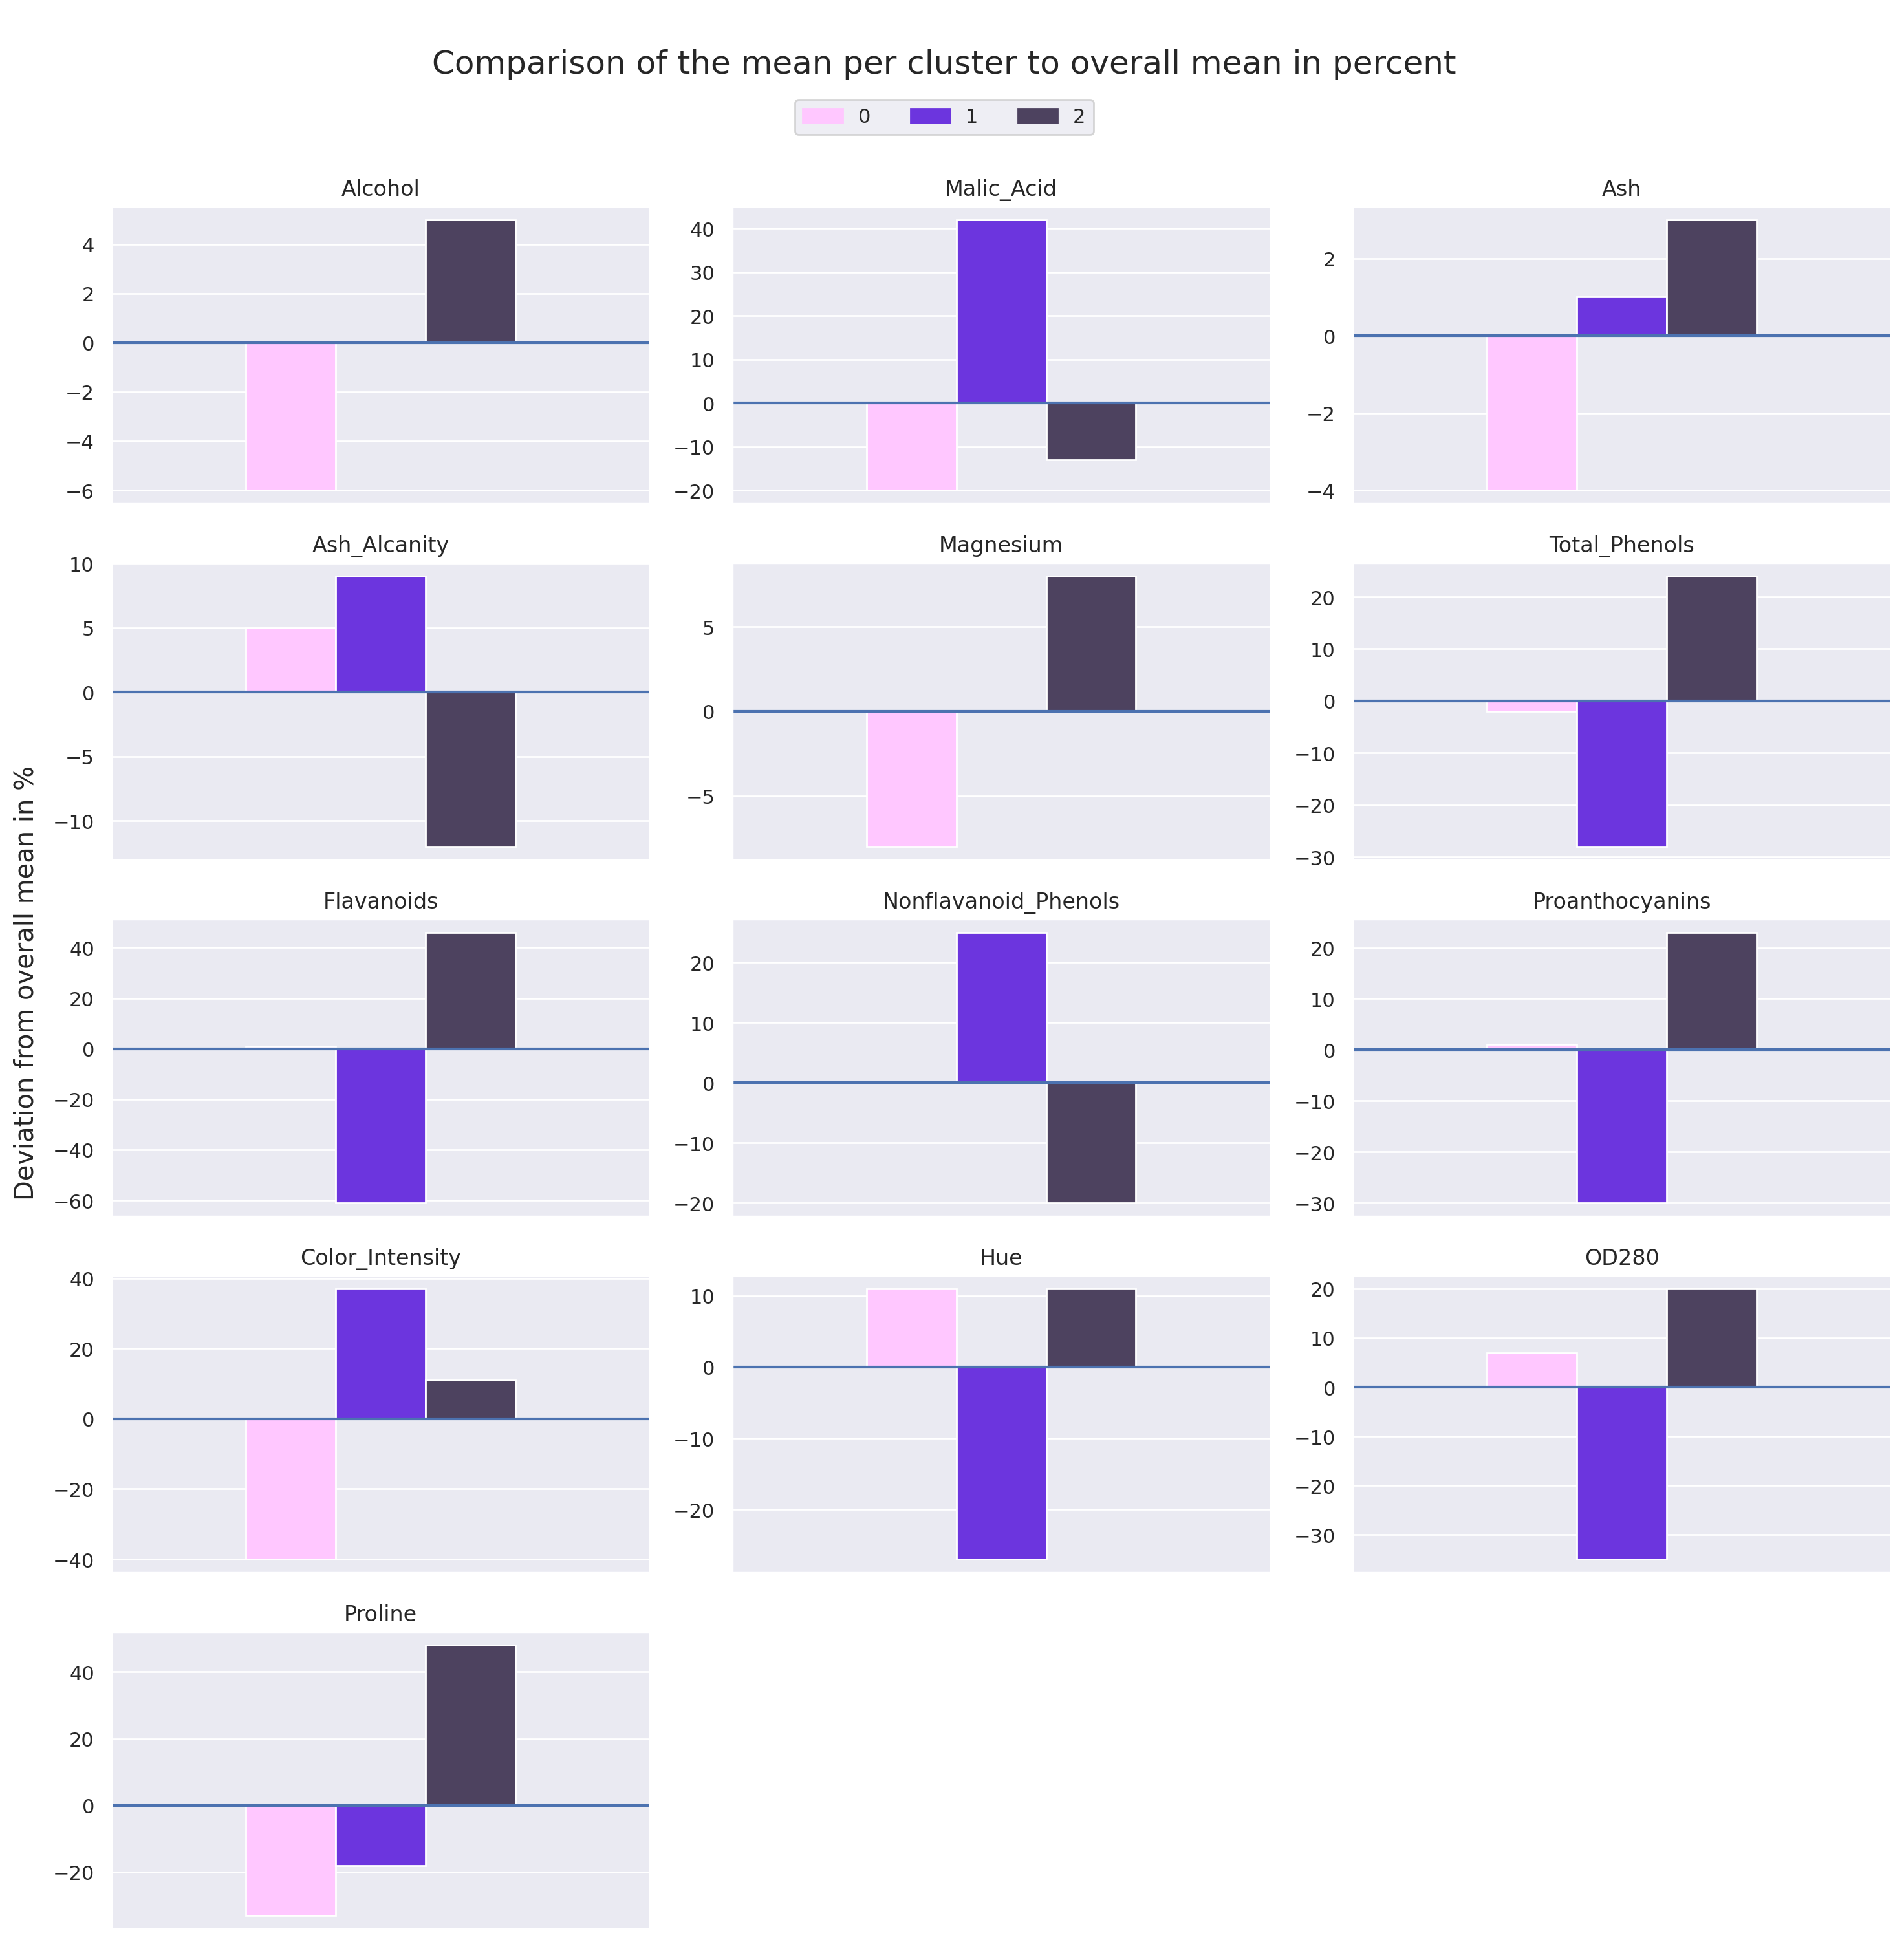

In [112]:

import matplotlib.patches as mpatches


def cluster_comparison_bar(X_comparison, colors, deviation=True ,title="Cluster results"):

    features = X_comparison.index
    ncols = 3
    clusters = len(X_comparison.columns)
    # calculate number of rows
    nrows = len(features) // ncols + (len(features) % ncols > 0)
    # set figure size
    fig = plt.figure(figsize=(15,15), dpi=200)
    #interate through every feature
    for n, feature in enumerate(features):
        # create chart
        ax = plt.subplot(nrows, ncols, n + 1)
        X_comparison[X_comparison.index==feature].plot(kind='bar', ax=ax, title=feature,
                                                             color=colors[0:clusters],
                                                             legend=False
                                                            )
        plt.axhline(y=0)
        x_axis = ax.axes.get_xaxis()
        x_axis.set_visible(False)

    c_labels = X_comparison.columns.to_list()
    c_colors = colors[0:3]
    mpats = [mpatches.Patch(color=c, label=l) for c,l in list(zip(colors[0:clusters],
                                                                  X_comparison.columns.to_list()))]

    fig.legend(handles=mpats,
               ncol=ncols,
               loc="upper center",
               fancybox=True,
               bbox_to_anchor=(0.5, 0.96)
              )
    axes = fig.get_axes()

    fig.suptitle(title, fontsize=18, y=1)
    fig.supylabel('Deviation from overall mean in %')
    plt.tight_layout()
    plt.subplots_adjust(top=0.90)
    plt.show()

cluster_comparison_bar(X_dev_rel, cluster_colors, title="\nComparison of the mean per cluster to overall mean in percent\n")

In [137]:
def cluster_characteristics(X_dev_rel, title="\nCluster characteristics\n"):
    colors = ['#9EBD6E','#81a094','#775b59','#32161f', '#946846', '#E3C16F', '#fe938c', '#E6B89C','#EAD2AC',
          '#DE9E36', '#4281A4','#37323E','#95818D'
         ]

    fig = plt.figure(figsize=(10,5), dpi=200)
    X_dev_rel.T.plot(kind='bar',
                        ax=fig.add_subplot(),
                        title="\nCluster characteristics\n",
                        color=colors,
                        xlabel="Cluster",
                        ylabel="Deviation from overall mean in %"
                        )
    plt.axhline(y=0, linewidth=1, ls='--', color='black')
    plt.legend(bbox_to_anchor=(1.04,1))
    fig.autofmt_xdate(rotation=0)
    plt.tight_layout()
    plt.show()

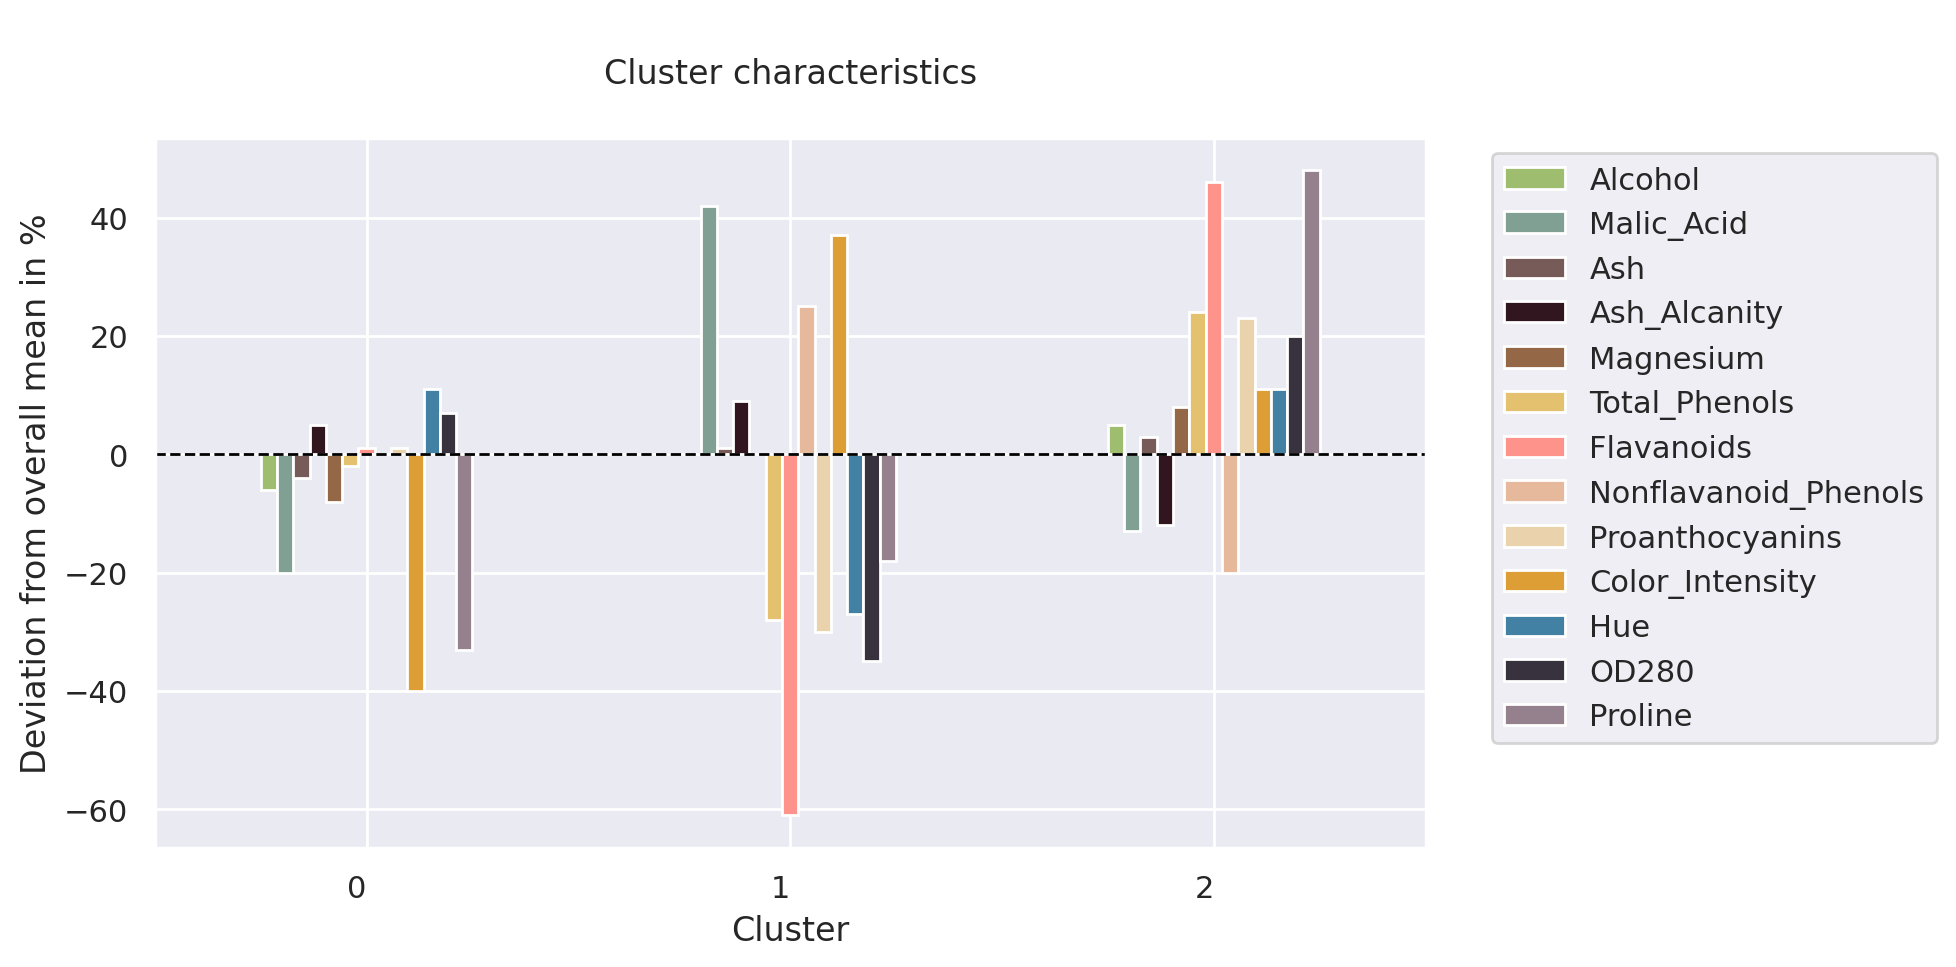

In [107]:
colors = ['#9EBD6E','#81a094','#775b59','#32161f', '#946846', '#E3C16F', '#fe938c', '#E6B89C','#EAD2AC',
          '#DE9E36', '#4281A4','#37323E','#95818D'
         ]

fig = plt.figure(figsize=(10,5), dpi=200)
X_dev_rel.T.plot(kind='bar',
                       ax=fig.add_subplot(),
                       title="\nCluster characteristics\n",
                       color=colors,
                       xlabel="Cluster",
                       ylabel="Deviation from overall mean in %"
                      )
plt.axhline(y=0, linewidth=1, ls='--', color='black')
plt.legend(bbox_to_anchor=(1.04,1))
fig.autofmt_xdate(rotation=0)
plt.tight_layout()
plt.show()

## Radar Chart

Text(0.5, 1.0, '\nCluster characteristics: \nFeature means per cluster\n')

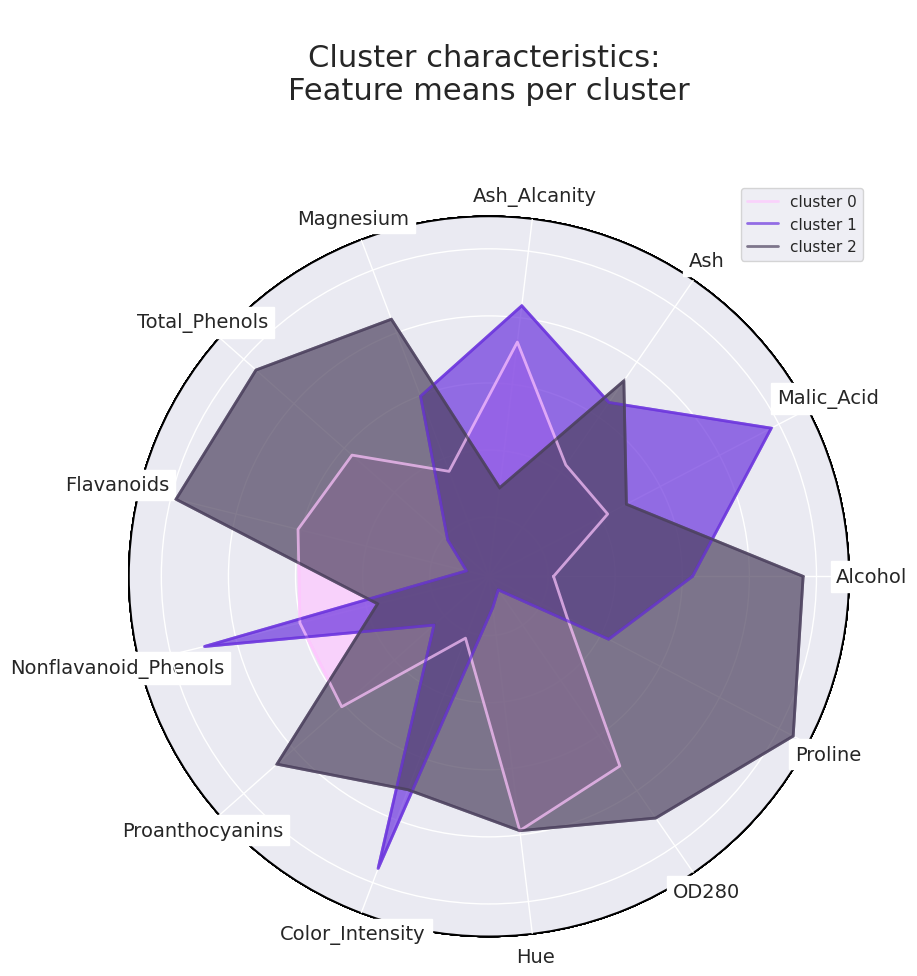

In [140]:
class Radar(object):
    def __init__(self, figure,title, labels, rect=None, ):
        if rect is None:
            rect = [0.05, 0.05, 0.9, 0.9]

        self.n = len(title)
        self.angles = np.arange(0, 360, 360.0/self.n)

        self.axes = [figure.add_axes(rect, projection='polar', label='axes%d' % i) for i in range(self.n)]
        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=title, fontsize=14, backgroundcolor="white",zorder=999) # Feature names
        self.ax.set_yticklabels([])

        for ax in self.axes[1:]:
            ax.xaxis.set_visible(False)
            ax.set_yticklabels([])
            ax.set_zorder(-99)

        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.spines['polar'].set_color('black')
            ax.spines['polar'].set_zorder(-99)

    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)
        kw['label'] = '_noLabel'
        self.ax.fill(angle, values,*args,**kw)

fig = plt.figure(figsize=(8, 8))
no_features = len(km.feature_names_in_)
radar = Radar(fig, km.feature_names_in_, labels = np.unique(km.feature_names_in_))

for k in range(0,km.n_clusters):
    cluster_data = X_std_mean[k].values.tolist()
    radar.plot(cluster_data,  '-', lw=2, color=cluster_colors[k], alpha=0.7, label='cluster {}'.format(k))

radar.ax.legend(fancybox=True,
               bbox_to_anchor=(1.03, 1.05)
              )
radar.ax.set_title("\nCluster characteristics: \nFeature means per cluster\n", size=22, pad=60)

# CORRELATION ANALYSIS

## Introduction

- Understanding the correlations between wine attributes provides valuable insights into the composition and potential quality of wines.

---

## Key Findings

### Alcohol and Magnesium (Correlation: 0.42)
- Moderate positive correlation suggests wines with higher alcohol content may also have higher magnesium levels.
- Winemakers can explore managing magnesium to influence both alcohol content and potential mineral nuances.

### Ash and Magnesium (Correlation: 0.42)
- Moderate positive correlation implies a connection between ash content and magnesium levels.
- Winemakers may explore how managing ash content can influence the overall mineral composition.

### Total Phenols and Ash Alcanity (Correlation: -0.46)
- Moderate negative correlation indicates wines with higher total phenols may exhibit lower ash alcalinity.
- Balancing phenolic content and ash alcalinity is crucial for achieving desired flavor profiles.

### Flavanoids and Malic Acid (Correlation: -0.46)
- Moderate negative correlation suggests an inverse relationship between flavanoids and malic acid.
- Winemakers can explore the impact of managing flavanoid levels on acidity and tartness.

### Color Intensity and Alcohol (Correlation: 0.55)
- Moderate positive correlation indicates wines with higher alcohol content may have higher color intensity.
- Consider the influence of alcohol levels on the visual appeal and color of the wine.

### Hue and Malic Acid (Correlation: -0.58)
- Moderate negative correlation suggests wines with higher malic acid content may exhibit lower color hue.
- Manage malic acid levels for both taste and visual aspects of the wine.

### Total Phenols and Flavanoids (Correlation: 0.88)
- Strong positive correlation emphasizes the significant relationship between total phenols and flavanoids.
- Recognize that changes in one of these attributes may strongly influence the other.

### Total Phenols and Nonflavanoid Phenols (Correlation: -0.5)
- Moderate negative correlation indicates a potential trade-off between total phenols and nonflavanoid phenols.
- Strike a balance between these phenolic compounds for a desired overall composition.

### Total Phenols and Proanthocyanins (Correlation: 0.65)
- Moderate positive correlation highlights a positive relationship between total phenols and proanthocyanins.
- Focus on managing overall phenolic content to influence the presence of specific compounds.

### Total Phenols and OD280 (Correlation: 0.7)
- Strong positive correlation indicates a significant relationship between total phenols and OD280 values.
- Recognize that changes in total phenols may strongly impact the protein content measured by OD280.

### Flavanoids and OD280 (Correlation: 0.78)
- Strong positive correlation emphasizes the significant relationship between flavanoids and OD280 values.
- Explore how managing flavanoid levels can influence the protein content of the wine.

### Flavanoids and Total Phenols (Correlation: 0.88)
- Strong positive correlation reinforces the strong connection between flavanoids and total phenols.
- Consider the interplay between these two crucial attributes for overall wine quality.

---

## Implications

- **Wine Quality Influence:** Strong correlations between Flavanoids, Proanthocyanins, and OD280 hint at a shared influence on wine quality.

- **Trade-offs:** Negative correlations (e.g., Malic Acid and Flavanoids) indicate potential trade-offs or contrasting effects in wine composition.

---

## Conclusion

- The correlations offer a glimpse into the intricate relationships between wine attributes, providing a foundation for further analysis and exploration.

---

# CLUSTERS PRESENTATION
## **Cluster 0: Light and Refreshing**
### Characteristics:
- **Lower Alcohol:** Wines in this cluster have lower alcohol content, contributing to a lighter and potentially more refreshing drinking experience.
- **Lower Malic Acid:** Reduced malic acid levels may result in wines with less tartness and acidity.
- **Lower Ash:** Wines in this cluster have lower ash content, potentially influencing the mineral profile.
- **Medium Ash Alcalinity:** Moderate ash alcalinity indicates a balanced acidity level.
- **Lower Magnesium:** Reduced magnesium levels may influence the mouthfeel and texture of the wine.
- **Medium Total Phenols:** A moderate level of total phenols suggests a balanced phenolic composition.
- **Medium Nonflavanoid Phenols:** These wines exhibit a moderate level of nonflavanoid phenols, contributing to the overall phenolic profile.
- **Medium Proanthocyanins:** A balanced level of proanthocyanins contributes to color intensity and potential health benefits.
- **Lower Color Intensity:** The wines in this cluster exhibit lower color intensity.
- **Medium OD280:** A medium OD280 value indicates a balanced protein content.
- **Lower Proline:** Reduced proline levels may contribute to a different mouthfeel.
- **Hue same as Cluster 2:** Similar hue values to Cluster 2 may suggest a shared color tone.

### Interpretation:
- Cluster 0 wines are characterized by their lighter profile, offering a refreshing and easy-drinking experience.
- Medium levels of Flavanoids, Proanthocyanins, and OD280 hint a medium level of wine quality.
- **Potential Appeal:** Individuals who enjoy lighter, well-balanced wines with moderate acidity and a nuanced flavor profile may find Cluster 0 wines appealing.
- **Food Pairing:** These wines may pair well with lighter dishes, salads, and seafood.

---

## **Cluster 1: Balanced and Versatile**
### Characteristics:
- **Medium Alcohol:** Wines in this cluster have a moderate alcohol content, providing a balanced and versatile drinking experience.
- **Higher Malic Acid:** Elevated malic acid levels may contribute to increased tartness and acidity.
- **Medium Ash:** These wines exhibit a moderate ash content, influencing the mineral profile.
- **Higher Ash Alcalinity:** Elevated ash alcalinity contributes to a higher acidity level.
- **Medium Magnesium:** A moderate level of magnesium influences the mouthfeel and texture of the wine.
- **Lower Total Phenols:** Wines in this cluster have lower total phenolic content, potentially resulting in a lighter flavor profile.
- **Higher Nonflavanoid Phenols:** Elevated nonflavanoid phenols contribute to a unique phenolic composition.
- **Medium Proanthocyanins:** A balanced level of proanthocyanins adds to the overall structure of the wine.
- **Higher Color Intensity:** Wines in this cluster exhibit increased color intensity.
- **Lower Hue:** Reduced hue values indicate a potentially different color tone.
- **Lower OD280:** A lower OD280 value suggests a different protein content.
- **Medium Proline:** Moderate proline levels contribute to the overall mouthfeel.

### Interpretation:
- Cluster 1 wines offer a balanced profile with a moderate alcohol level, elevated acidity, and unique phenolic composition.
- Lower levels of Flavanoids, Proanthocyanins, and OD280 hint a lower level of wine quality.
- **Potential Appeal:** Those seeking wines with versatility, moderate complexity, and a balanced acidity may find Cluster 1 wines appealing.
- **Food Pairing:** These wines may pair well with a variety of dishes, including poultry, pasta, and grilled vegetables.

---

## **Cluster 2: Bold and Complex**
### Characteristics:
- **Higher Alcohol:** Wines in this cluster have higher alcohol content, contributing to a fuller body and potentially warmer sensation.
- **Medium Malic Acid:** A moderate level of malic acid contributes to a balanced acidity.
- **High Ash:** These wines exhibit higher ash content, potentially influencing the mineral profile.
- **Lower Ash Alcalinity:** Reduced ash alcalinity contributes to a lower acidity level.
- **Higher Magnesium:** Elevated magnesium levels influence the mouthfeel and texture of the wine.
- **Higher Total Phenols:** Wines in this cluster have higher total phenolic content, suggesting a richer flavor profile.
- **Lower Nonflavanoid Phenols:** Reduced nonflavanoid phenols contribute to a distinct phenolic composition.
- **Higher Proanthocyanins:** Elevated proanthocyanin levels add to the overall structure and potential health benefits.
- **Medium Color Intensity:** The wines in this cluster exhibit a moderate level of color intensity.
- **Hue same as Cluster 0:** Similar hue values to Cluster 0 may suggest a shared color tone.
- **Higher OD280:** An elevated OD280 value indicates a potentially higher protein content.
- **Higher Proline:** Elevated proline levels contribute to the overall mouthfeel.

### Interpretation:
- Cluster 2 wines are characterized by their boldness, richer flavor profile, and fuller body.
- Strong levels of Flavanoids, Proanthocyanins, and OD280 hint a higher level of wine quality.
- **Potential Appeal:** Enthusiasts seeking more intense and complex wines with higher alcohol content and robust flavors may find Cluster 2 wines appealing.
- **Food Pairing:** These wines may pair well with hearty dishes, red meats, and aged cheeses.

---

## **Implications for Wine Lovers and Producers:**
**For Wine Lovers:**
- Consider your preferences for alcohol content, acidity, and flavor intensity when selecting wines.
- If you enjoy lighter wines with balanced acidity, Cluster 0 wines may be appealing.
- If you prefer wines with moderate acidity, elevated color intensity, and a unique phenolic profile, Cluster 1 wines might be suitable.
- For those who appreciate bolder and fuller-bodied wines with a richer flavor profile, Cluster 2 wines may be the preferred choice.


## Creative Insights and Storytelling
Beyond the technical analysis, craft a narrative around your findings. 

What interesting stories do the data tell about the wines?

Are there any unexpected correlations or findings that could be of interest to wine makers or enthusiasts?
